### Libraries, functions, data load and clean

In [46]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib notebook
%matplotlib notebook
plt.rcParams['figure.figsize'] = [6, 3]

In [2]:
def plot_scatter(stat, ax, xcolumn, ycolumn):    
    ax.scatter(stat[xcolumn].values, stat[ycolumn].values)
    ax.plot(stat[xcolumn], linear_regression(stat, xcolumn, ycolumn), color='red')

    ax.set_xlabel(xcolumn, fontsize=12)
    ax.set_ylabel(ycolumn, fontsize=12)
    
    ax.hlines(0, stat[xcolumn].min(), stat[xcolumn].max(), linestyles='dashed', alpha=0.3)

In [3]:
def linear_regression(data, x_name, y_name):
    X = data.loc[:, x_name].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.loc[:, y_name].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression().fit(X, Y)  # create object for the class
    print(f'r_sqr value: {linear_regressor.score(X, Y)}')
    return linear_regressor.predict(X)

In [4]:
# Current directory
cwd = os.getcwd()

In [50]:
# Load data
df=pd.read_csv(cwd + '/stat.csv', index_col=0)
df.describe()

,open_price,volume,spread_at_open,spread_at_close,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,delta_move,delta_move_pct,holding_time_2
count,51243.000000,5.124300e+04,51243.000000,51243.000000,51243.000000,5.124300e+04,5.124300e+04,5.124300e+04,51243.000000,51243.000000,51243.000000
mean,74.974161,2.141154e+06,0.109670,0.095745,6.941026,NaN,NaN,NaN,-0.050307,-0.085866,17854.147884
std,106.323160,4.575146e+06,0.401153,0.359454,5.864284,NaN,NaN,NaN,0.313649,0.239999,24664.391824
min,0.330000,0.000000e+00,0.000000,-0.010000,1.000000,-inf,-inf,-inf,-30.020000,-7.076923,100.000000
25%,19.460000,4.012730e+05,0.020000,0.010000,3.000000,-6.695653e-02,-6.918312e-02,-1.737230e-01,-0.060000,-0.130201,500.000000
50%,43.800000,9.227170e+05,0.050000,0.040000,5.000000,7.420110e-04,-7.774689e-04,-7.006773e-03,-0.010000,-0.035273,10000.000000
75%,94.710000,2.110186e+06,0.120000,0.110000,9.000000,7.391843e-02,7.004045e-02,1.678459e-01,0.000000,0.000000,60000.000000
max,4237.010000,1.071414e+08,30.020000,30.020000,43.000000,inf,inf,inf,18.950000,6.476030,60000.000000


Some +-inf values in `imbBeforeReversePct`, `imbAfterReversePct` and `deltaImbPct`. That's because we divide by `volume` to calculate these columns. And we find some zero values in this column 

In [51]:
# filter zero volume rows 
df = df[df['volume'] > 0]

In [52]:
print(len(df))
df.describe()

51228


,open_price,volume,spread_at_open,spread_at_close,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,delta_move,delta_move_pct,holding_time_2
count,51228.000000,5.122800e+04,51228.000000,51228.000000,51228.000000,51228.000000,51228.000000,51228.000000,51228.000000,51228.000000,51228.000000
mean,74.993475,2.141781e+06,0.109664,0.095740,6.942453,0.027927,0.009466,-0.018461,-0.050306,-0.085715,17853.841649
std,106.332724,4.575669e+06,0.401211,0.359505,5.864535,0.770632,0.880320,1.387362,0.313693,0.239561,24664.258910
min,0.330000,1.070000e+02,0.000000,-0.010000,1.000000,-11.120005,-27.797698,-28.327416,-30.020000,-7.076923,100.000000
25%,19.470000,4.012730e+05,0.020000,0.010000,3.000000,-0.066952,-0.069180,-0.173716,-0.060000,-0.130102,500.000000
50%,43.800000,9.227170e+05,0.050000,0.040000,5.000000,0.000742,-0.000777,-0.007058,-0.010000,-0.035270,10000.000000
75%,94.720000,2.110186e+06,0.120000,0.110000,9.000000,0.073861,0.069945,0.167833,0.000000,0.000000,60000.000000
max,4237.010000,1.071414e+08,30.020000,30.020000,43.000000,22.276147,22.924546,25.860035,18.950000,6.476030,60000.000000


Now the data seems normal.

In [53]:
# Add new columns
df.loc[:, 'abs_deltaImbPct'] = abs(df['deltaImbPct'])
df.loc[:, 'abs_imbBeforeReversePct'] = abs(df['imbBeforeReversePct'])
df.loc[:, 'abs_imbAfterReversePct'] = abs(df['imbAfterReversePct'])
df.head(2)

,symbol,start,stop,open_price,close_status,volume,spread_at_open,spread_at_close,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,direction,delta_move,delta_move_pct,holding_time_2,abs_deltaImbPct,abs_imbBeforeReversePct,abs_imbAfterReversePct
0,A,2020-11-04 15:55:11.232500,2020-11-04 15:55:12.232500,108.75,market,1051056,0.09,0.13,1,-0.001237,0.007611,0.008848,Long,-0.14,-0.128736,1000,0.008848,0.001237,0.007611
1,A,2020-11-04 15:55:11.232500,2020-11-04 15:55:21.232500,108.75,market,1051056,0.09,0.06,1,-0.001237,0.007611,0.008848,Long,-0.13,-0.119540,10000,0.008848,0.001237,0.007611


Plot columns to check if no outliers and data distributes well.

<IPython.core.display.Javascript object>


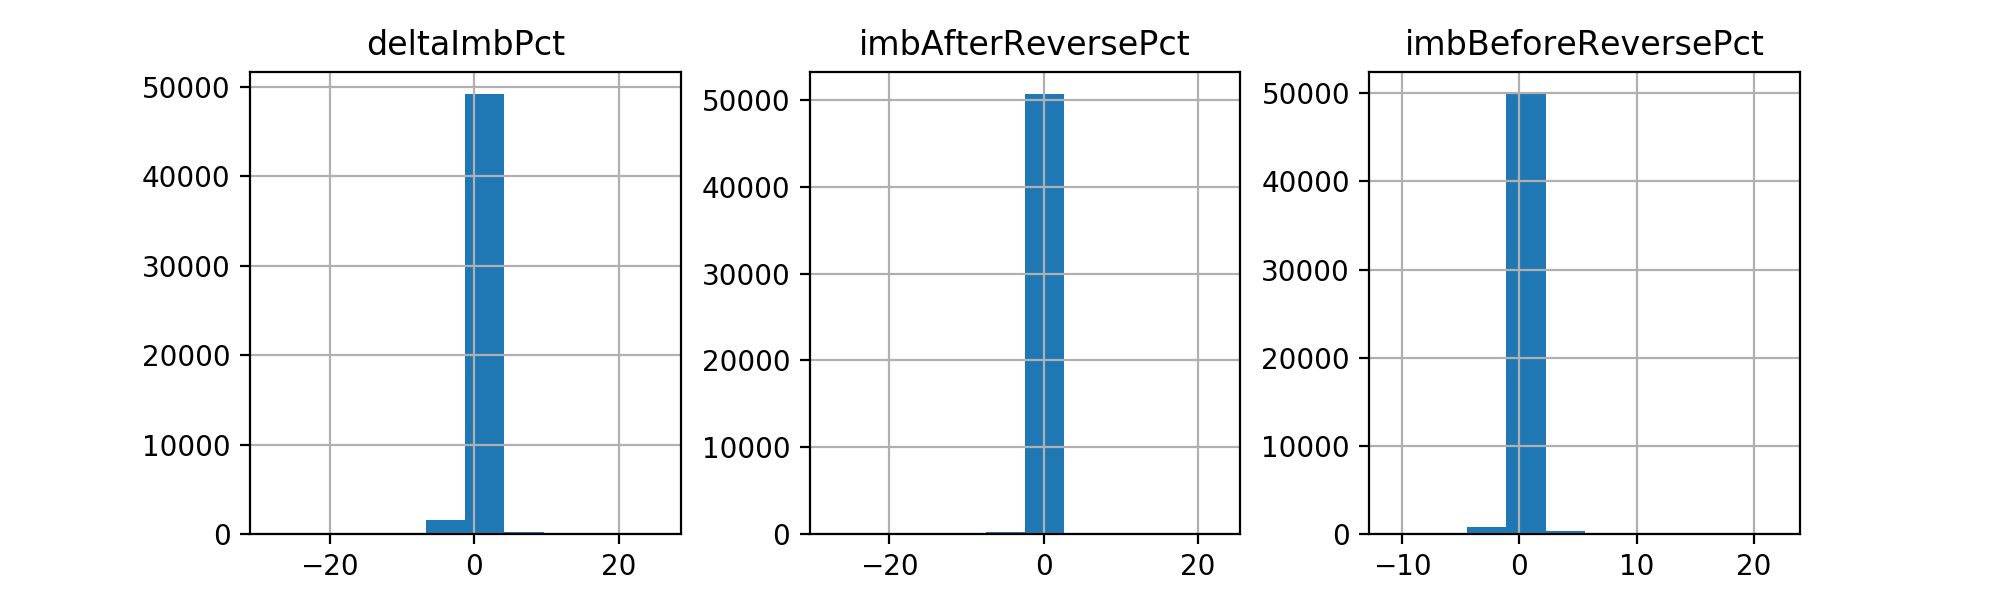

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127773cc0>,
      dtype=object)

In [57]:
df.hist(column=['deltaImbPct', 'imbBeforeReversePct', 'imbAfterReversePct'], layout=(1,3), figsize=(10,3))

## Research 

At this point, we can make our research to develop thresholds rules. 
1. For one instrument we have multiple reversals (column `reversal_count`);
2. For one instrument we have different holding intervals in milliseconds (column `holding_time_2`): 100, 200, 500, 1000, 10000, 60000;
3. Potentially, we want to avoid wide spread as we trade with market orders (columns `spread_at_open`, `spread_at_close`);
4. Filter out not liquid instruments with column `volume`;
5. And the most important thresholds should be in: `imbBeforeReversePct`, `imbAfterReversePct`,	`deltaImbPct`;
6. Column `deltaImbPct` is difference between `imbBeforeReversePct` and `imbAfterReversePct`;
7. Column `delta_move` is measured in cents and	column `delta_move_pct` in % from open price;
8. Columns: `delta_move_pct` and `delta_move` are our dependant variables, returns of which we want to maximize;
9. Additional column `close_status` tell us how we closed a position: "moc", "market". 

First, lets check some common-sense realtions like:
- wider spread leads to bigger losses (as we trade with market order);
- higher volume/liquidity - tighter spreads;
- longer holding interval means more volatility in delta move;
- first reversal should be the most significant one;
- others (will add later).


### Spread 

Wider spread leads to bigger losses (as we trade with market order)

<IPython.core.display.Javascript object>


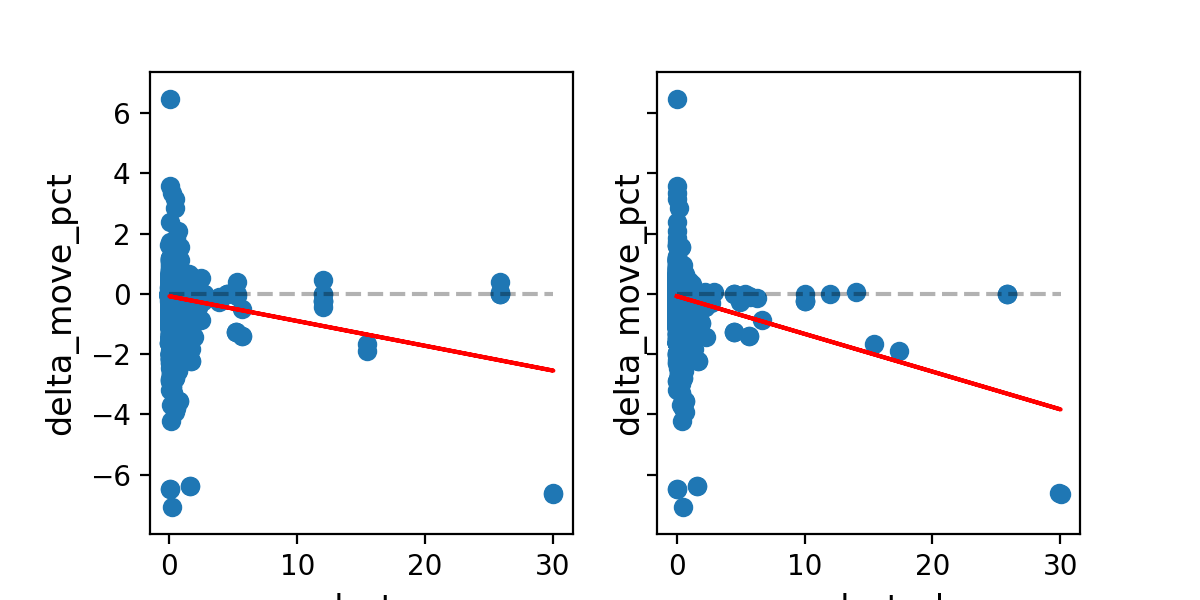

r_sqr value: 0.01897712396670026
r_sqr value: 0.035320017943682225


In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plot_scatter(df, ax1, 'spread_at_open', 'delta_move_pct')
plot_scatter(df, ax2, 'spread_at_close', 'delta_move_pct')

There are some stocks with spreads more than 25 dollars (high price). Maybe we need a filter for a price as well. But at this point, I will filter only `spread_at_open`. I don't want to filter `spread_at_close` as at the time of entry we don't what the spread will be - avoid look-ahead bias 

In [17]:
df_filter_by_spread = df[df['spread_at_open'] < 0.2]

<IPython.core.display.Javascript object>


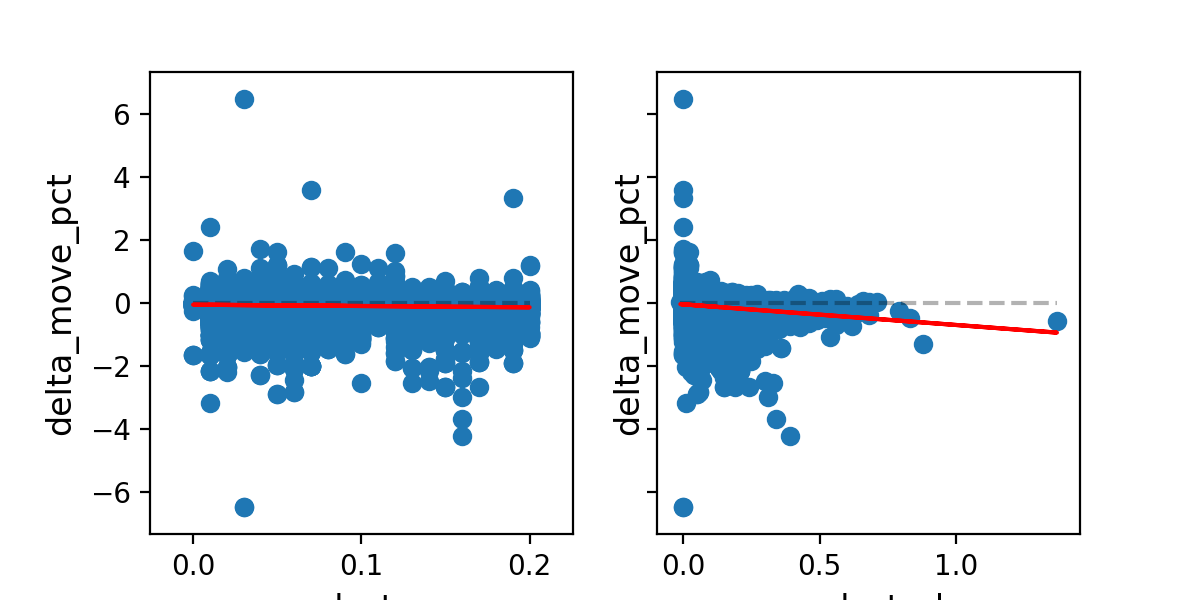

r_sqr value: 0.010183050570555794
r_sqr value: 0.03947400395539857


In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plot_scatter(df_filter_by_spread, ax1, 'spread_at_open', 'delta_move_pct')
plot_scatter(df_filter_by_spread, ax2, 'spread_at_close', 'delta_move_pct')

Even with 20 cents spread at the moment of opening the position we still have some significant spread at the close. So, additional filters for *volume and price* are needed.

### Volume and Price

<IPython.core.display.Javascript object>


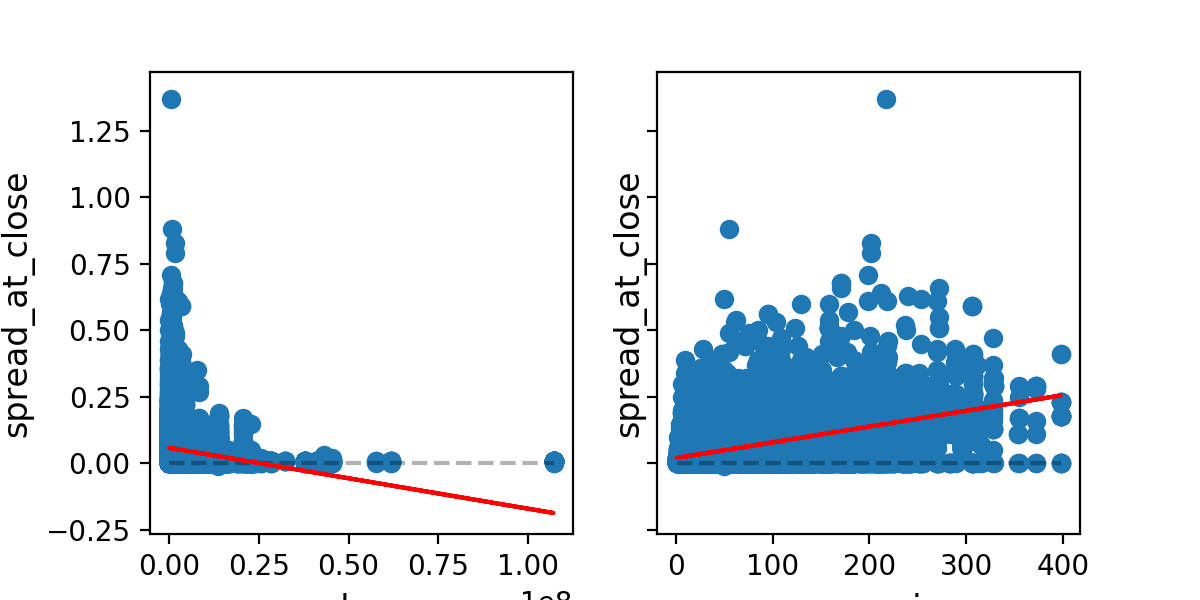

r_sqr value: 0.03212855773188328
r_sqr value: 0.2684276278568606


In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
plot_scatter(df_filter_by_spread, ax1, 'volume', 'spread_at_close')
plot_scatter(df_filter_by_spread, ax2, 'open_price', 'spread_at_close')

Lower volume, higher price - wider spreads.

<IPython.core.display.Javascript object>


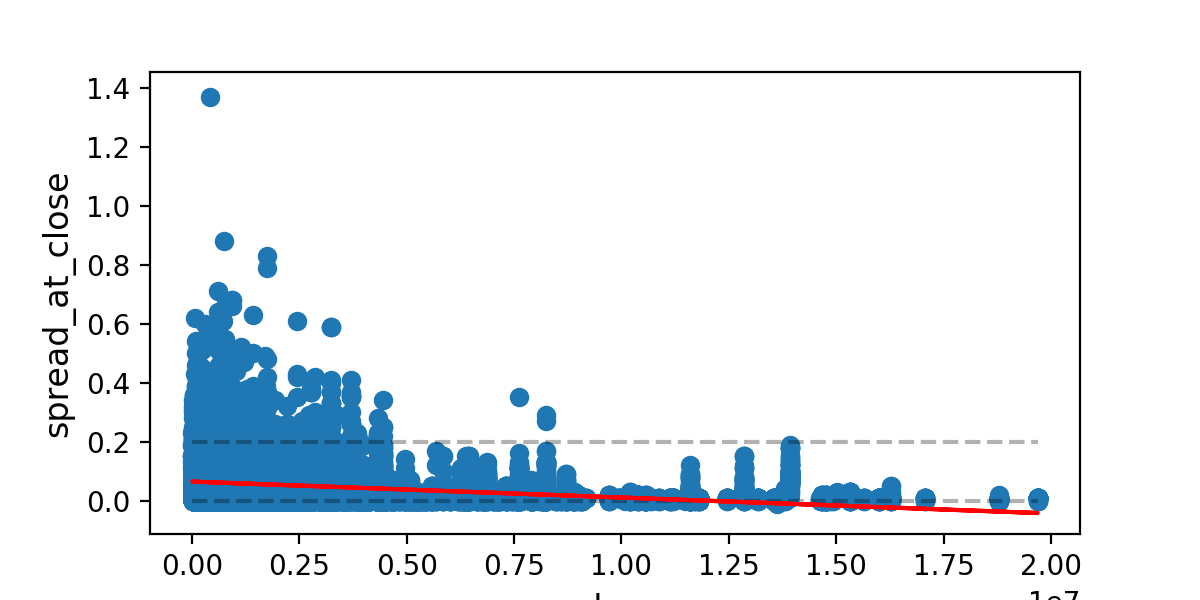

r_sqr value: 0.055670409340967564


In [63]:
df_filter_by_spread_volume = df_filter_by_spread[df_filter_by_spread['volume'] < 20000000]
fig, ax = plt.subplots(1,1)
plot_scatter(df_filter_by_spread_volume, ax, 'volume', 'spread_at_close')
ax.hlines(0.2, df_filter_by_spread_volume['volume'].min(), df_filter_by_spread_volume['volume'].max(), linestyles='dashed', alpha=0.3)

With a volume of more than 5 mln there is almost none spreads wider than 20 cents. Let's take a closer look.

<IPython.core.display.Javascript object>


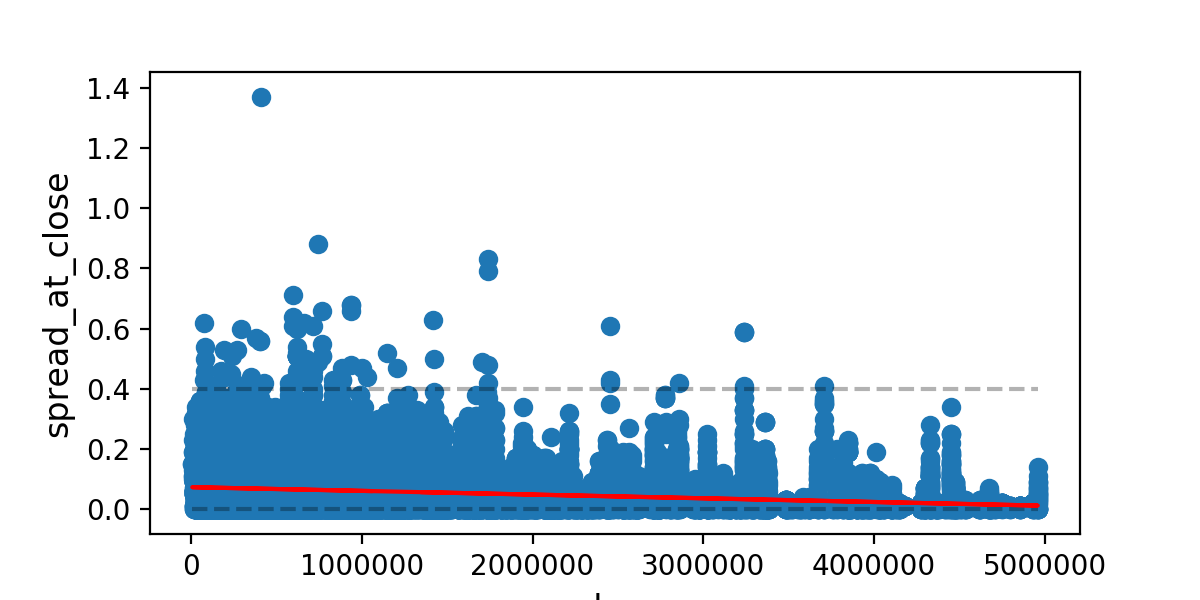

r_sqr value: 0.04785083622808961


In [102]:
df_filter_by_spread_volume = df_filter_by_spread[df_filter_by_spread['volume'] < 5000000]
fig, ax = plt.subplots(1,1)
plot_scatter(df_filter_by_spread_volume, ax, 'volume', 'spread_at_close')
ax.hlines(0.4, df_filter_by_spread_volume['volume'].min(), df_filter_by_spread_volume['volume'].max(), linestyles='dashed', alpha=0.3)

With a volume of less than **2 mln** there are many cases with a spread higher than **40 cents**. Let's incorporate this volume filter

In [65]:
df_filter_by_spread_volume = df_filter_by_spread[df_filter_by_spread['volume'] > 2000000]

### Holding period

Holding period analysis

[  100   200   500  1000 10000 60000]


<IPython.core.display.Javascript object>


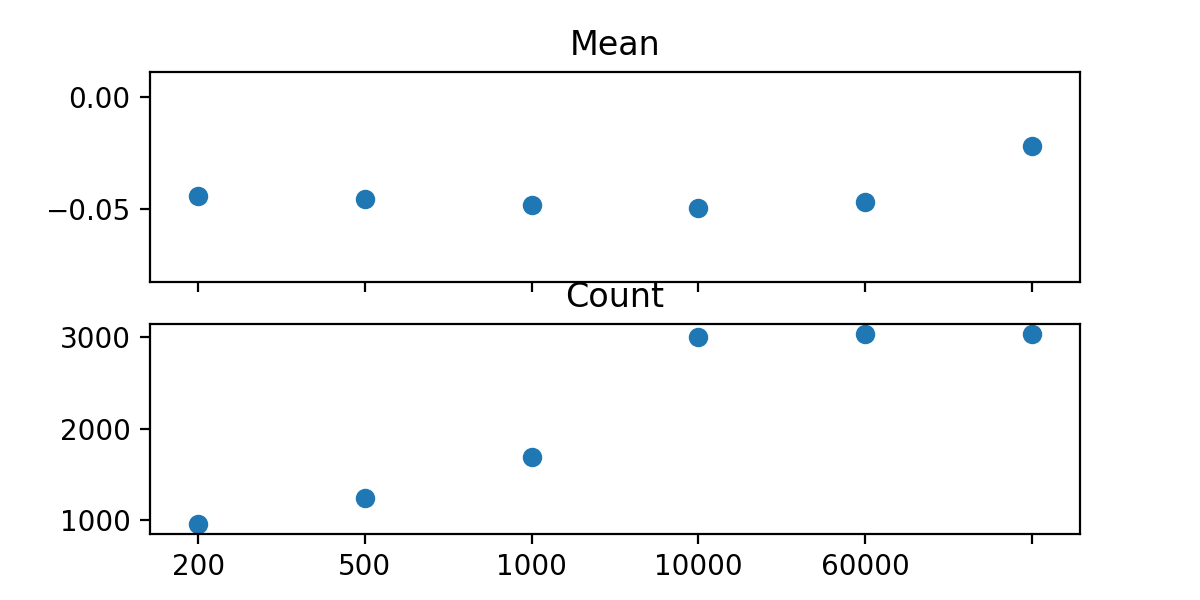

[Text(0,0,'100'),
 Text(0,0,'200'),
 Text(0,0,'500'),
 Text(0,0,'1000'),
 Text(0,0,'10000'),
 Text(0,0,'60000')]

In [66]:
df_group_by_holding = df_filter_by_spread_volume.groupby(['holding_time_2']).agg({'delta_move_pct': ['mean', 'count']})
df_group_by_holding = df_group_by_holding.reset_index(drop=False)

mean_by_group = df_group_by_holding.iloc[:, df_group_by_holding.columns.get_level_values(1)=='mean']
count_by_group = df_group_by_holding.iloc[:, df_group_by_holding.columns.get_level_values(1)=='count']

print(df_group_by_holding['holding_time_2'].values)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.scatter(df_group_by_holding.index, mean_by_group)
ax2.scatter(df_group_by_holding.index, count_by_group)
ax1.set_title('Mean')
ax2.set_title('Count')
ax2.set_xticklabels(df_group_by_holding['holding_time_2'].values)

Count for the last 3 holding periods (1000, 10000, 60000) are almost equal and 2-3 times bigger. This is due to a lack of market data for shorter intervals. 

The best result (mean delta move in pct) is for 1 min (60000 milliseconds) interval. It is 50-100% better as for the rest of the intervals. But there is weak evidence that this happens due to some fundamental reason as it is not progressing with the rise of holding interval. It jumps. The only explanation is that other participants have plenty of time to react. 

Check if other dates have the same pattern. 
And look deeper if there are some outliers/contributors as 1 min is a huge time interval and anything can happen.

For now, I will apply this filter and leave it as it is and get back to this analysis later. 

### Imbalance change

In [26]:
df_filter_by_spread_volume_holding = df_filter_by_spread_volume[df_filter_by_spread_volume['holding_time_2']==60000]

The most interesting part and the most significant threshold is relationship between absolute values of  before/after/delta imbalance and return. 

<IPython.core.display.Javascript object>


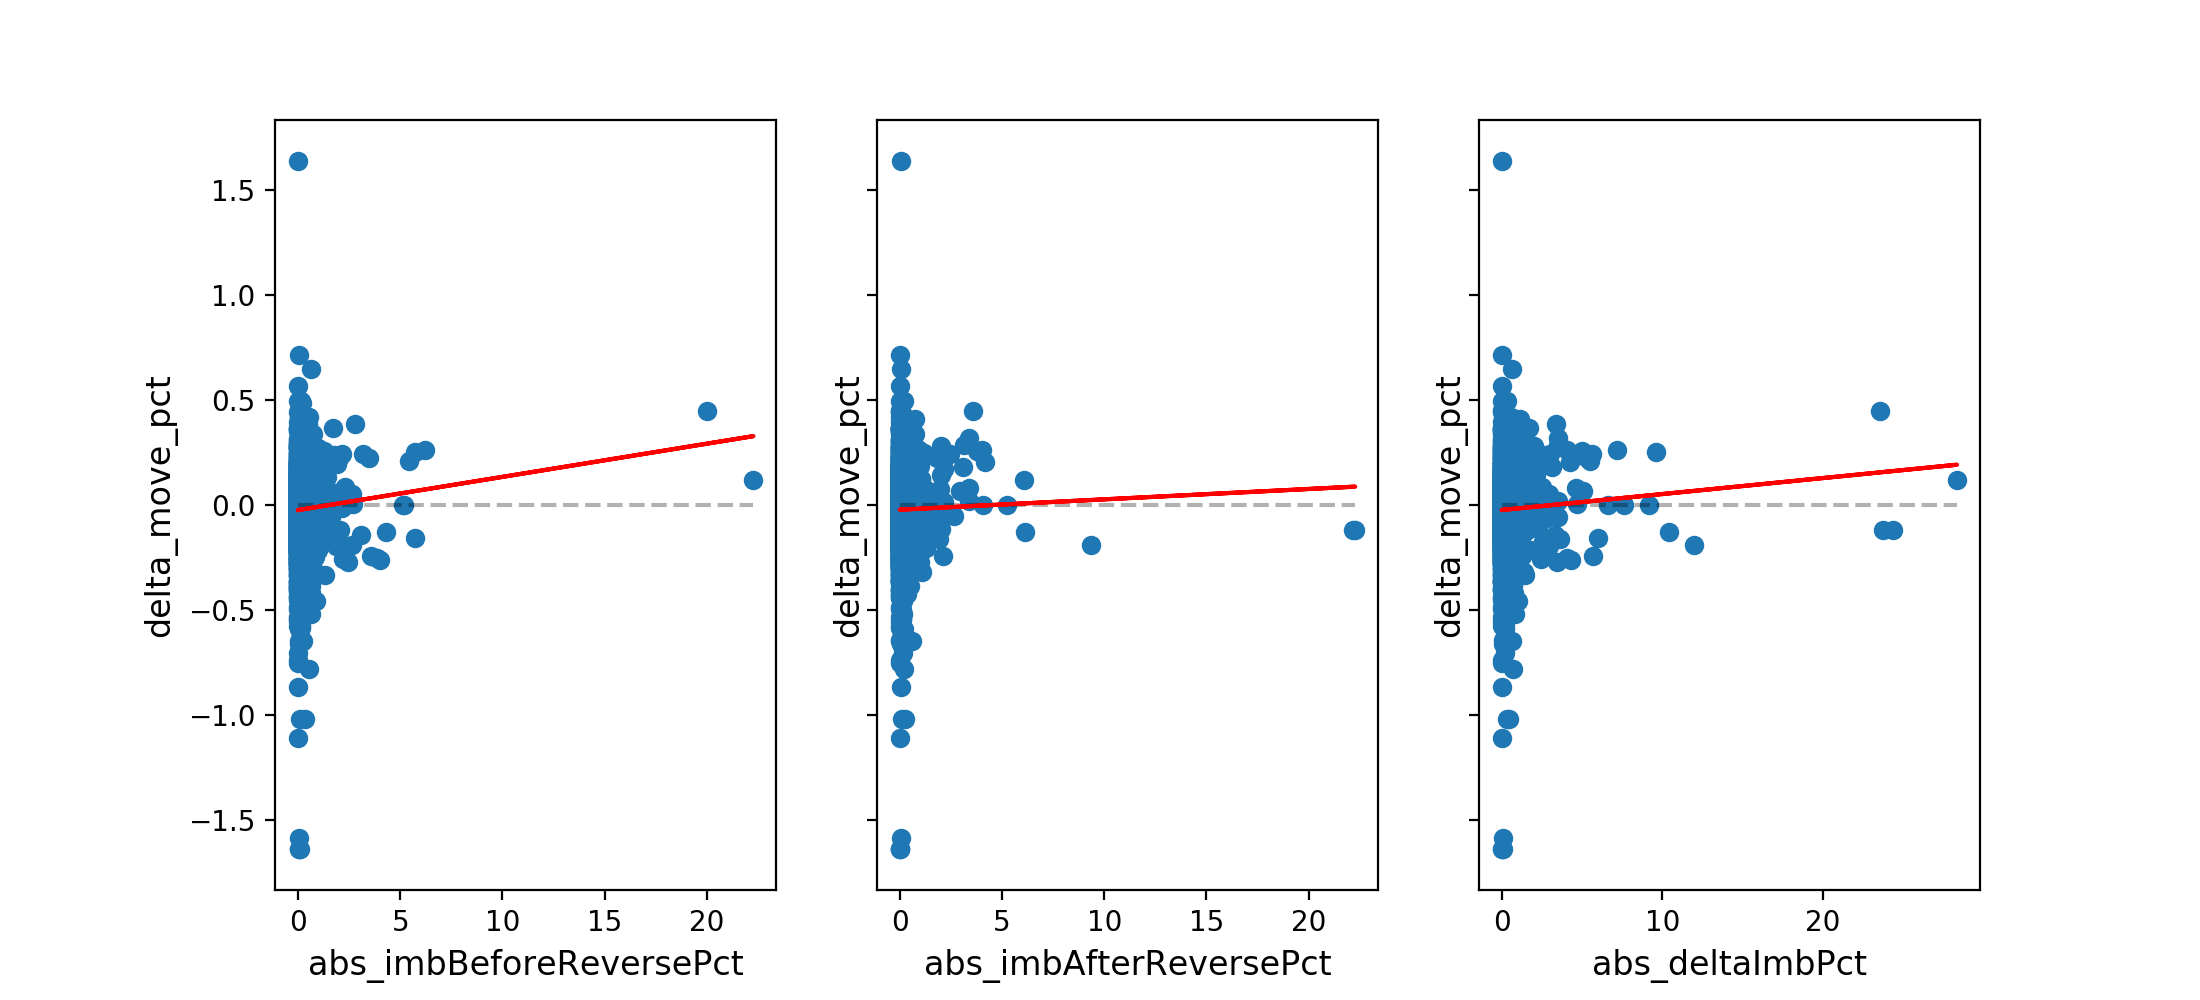

r_sqr value: 0.003967046549775977
r_sqr value: 0.00041720249781918023
r_sqr value: 0.002557144536723621


In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,5))
plot_scatter(df_filter_by_spread_volume_holding, ax1, 'abs_imbBeforeReversePct', 'delta_move_pct')
plot_scatter(df_filter_by_spread_volume_holding, ax2, 'abs_imbAfterReversePct', 'delta_move_pct')
plot_scatter(df_filter_by_spread_volume_holding, ax3, 'abs_deltaImbPct', 'delta_move_pct')

Seems like the most significant factors are `abs_imbBeforeReversePct` and `abs_deltaImbPct`. But all factors showed a positive relationship which is inline with our expectations. For now, I want to get rid of small values of these factors. 

But first we need to leave on one position per instrument. And we will pick up the one where the `abs_imbBeforeReversePct` is first.

## Results 

In [68]:
deltaImbPct_filter = [0.1, 0.2, 0.5, 1, 2, 5, 10]
stats = []
for f in deltaImbPct_filter:
    
    # Filter
    df_filter_by_spread_volume_holding_deltaimb = df_filter_by_spread_volume_holding[df_filter_by_spread_volume_holding['abs_deltaImbPct'] > f]
    # Leave only one position per instrument
    df_filter_by_spread_volume_holding_deltaimb_symbol = df_filter_by_spread_volume_holding_deltaimb.groupby(['symbol']).first()
    # Stats
    sum_returns = df_filter_by_spread_volume_holding_deltaimb_symbol['delta_move_pct'].sum()
    mean_returns = df_filter_by_spread_volume_holding_deltaimb_symbol['delta_move_pct'].mean()
    count_returns = df_filter_by_spread_volume_holding_deltaimb_symbol['delta_move_pct'].count()
    stats.append({'sum': sum_returns,
                  'mean': mean_returns,
                  'count':count_returns,
                  'deltaImb_filter': f})
stats_df = pd.DataFrame(stats)
stats_df

,sum,mean,count,deltaImb_filter
0,-11.482474,-0.033574,342,0.1
1,-4.988181,-0.017815,280,0.2
2,-0.045390,-0.000259,175,0.5
3,2.488456,0.029276,85,1.0
4,2.249575,0.049991,45,2.0
5,1.370968,0.091398,15,5.0
6,0.007188,0.001797,4,10.0


<IPython.core.display.Javascript object>


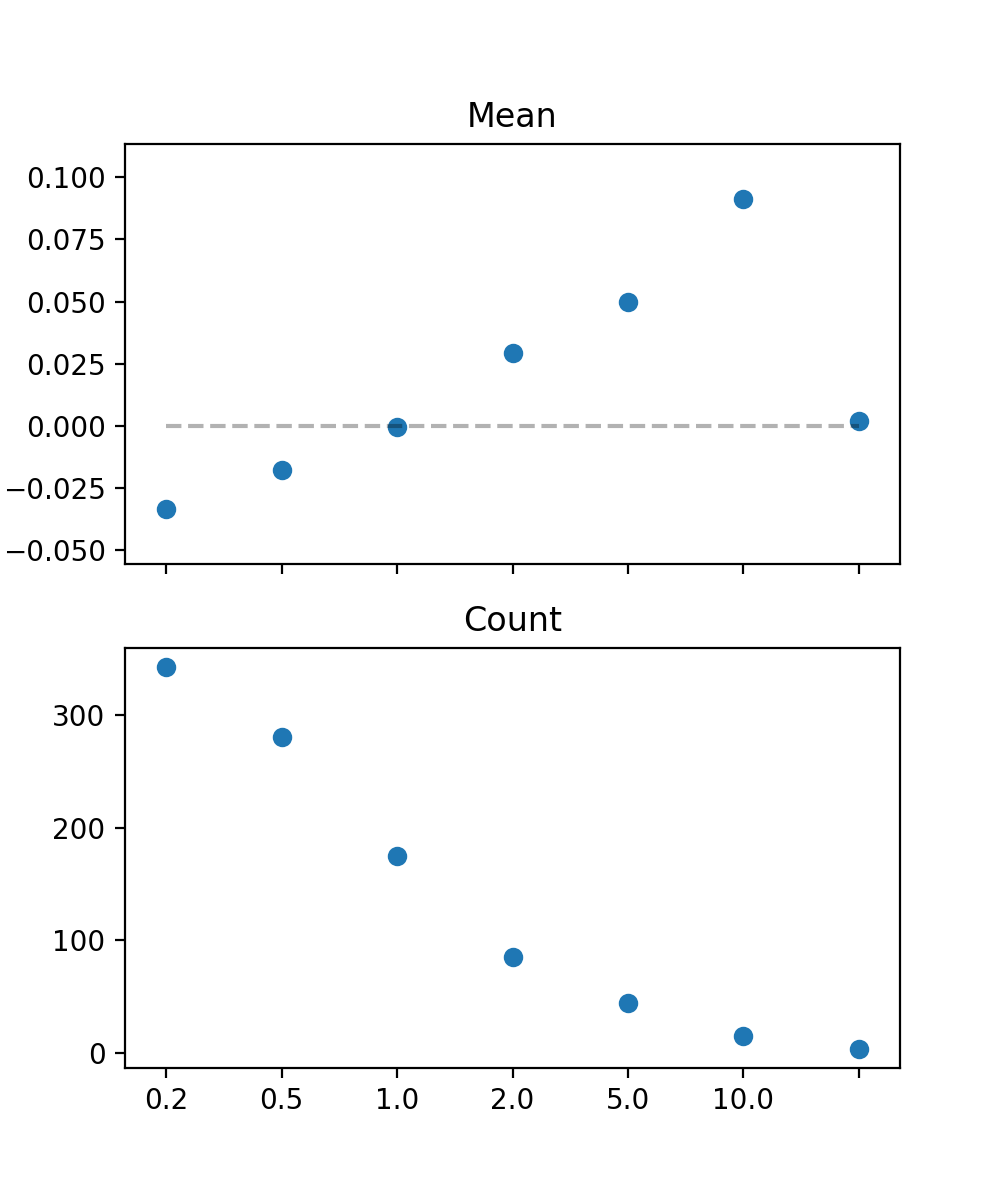

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,6))
ax1.scatter(stats_df.index, stats_df['mean'])
ax2.scatter(stats_df.index, stats_df['count'])
ax1.set_title('Mean')
ax2.set_title('Count')
ax2.set_xticklabels(stats_df['deltaImb_filter'])
ax1.hlines(0, stats_df.index[0], stats_df.index[-1], linestyles='dashed', alpha=0.3)

We can see that mean delta move in pct steadily increasing with the rise of deltaImb filter. Let's check our tables

### Analysis of results

In [90]:
# Filter
df_filter_by_spread_volume_holding_deltaimb = df_filter_by_spread_volume_holding[df_filter_by_spread_volume_holding['abs_deltaImbPct'] > 1]

In [95]:
# Leave only one position per instrument
df_filter_by_spread_volume_holding_deltaimb_symbol = df_filter_by_spread_volume_holding_deltaimb.groupby(['symbol']).first()
df_filter_by_spread_volume_holding_deltaimb_symbol

,start,stop,open_price,close_status,volume,spread_at_open,spread_at_close,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,direction,delta_move,delta_move_pct,holding_time_2,abs_deltaImbPct,abs_imbBeforeReversePct,abs_imbAfterReversePct
symbol,,,,,,,,,,,,,,,,,,
ABBV,2020-11-04 15:59:19.110754,2020-11-04 16:00:00.000000,94.50,moc,7901531,0.04,0.00,1,-5.203700,1.434114,6.637815,Long,0.00,0.000000,60000,6.637815,5.203700,1.434114
ACI,2020-11-04 15:56:15.261205,2020-11-04 15:57:15.261205,15.45,market,3278834,0.01,0.01,1,0.047852,-1.019600,-1.067453,Short,0.00,0.000000,60000,1.067453,0.047852,1.019600
ADM,2020-11-04 15:59:06.246971,2020-11-04 16:00:00.000000,46.54,moc,2977449,0.01,0.00,6,-0.141128,1.052310,1.193438,Long,-0.03,-0.064461,60000,1.193438,0.141128,1.052310
ALK,2020-11-04 15:59:19.110685,2020-11-04 16:00:00.000000,37.89,moc,2260313,0.01,0.00,1,1.782098,-0.938852,-2.720951,Short,0.09,0.237530,60000,2.720951,1.782098,0.938852
AXP,2020-11-04 15:59:14.106939,2020-11-04 16:00:00.000000,96.40,moc,4036859,0.03,0.00,1,-2.167254,0.461175,2.628430,Long,0.00,0.000000,60000,2.628430,2.167254,0.461175
AXTA,2020-11-04 15:59:14.253645,2020-11-04 16:00:00.000000,25.98,moc,3139700,0.02,0.00,1,-2.456349,0.965920,3.422270,Long,-0.07,-0.269438,60000,3.422270,2.456349,0.965920
BAX,2020-11-04 15:59:49.266563,2020-11-04 16:00:00.000000,75.63,moc,2609851,0.02,0.00,12,0.042071,-1.003506,-1.045577,Short,-0.04,-0.052889,60000,1.045577,0.042071,1.003506
BK,2020-11-04 15:59:47.112527,2020-11-04 16:00:00.000000,34.70,moc,5244683,0.01,0.00,5,0.620247,-0.485063,-1.105310,Short,0.00,0.000000,60000,1.105310,0.620247,0.485063
BRK.B,2020-11-04 15:58:44.248375,2020-11-04 15:59:44.248375,206.23,market,4330412,0.08,0.13,1,-0.663101,0.559531,1.222632,Long,-0.14,-0.067885,60000,1.222632,0.663101,0.559531


<IPython.core.display.Javascript object>


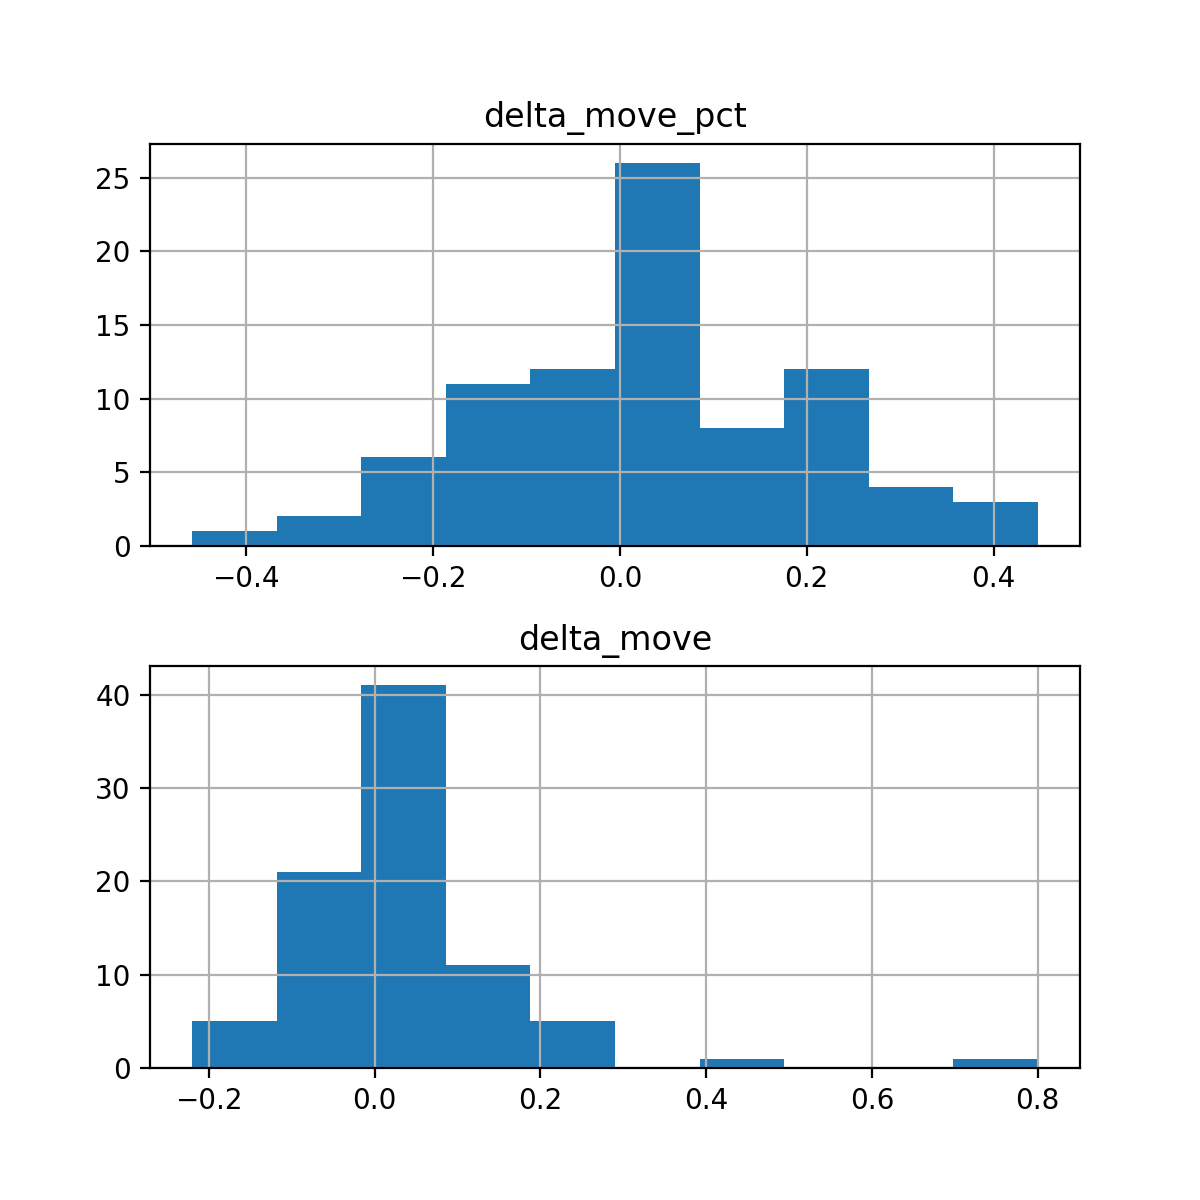

array([<matplotlib.axes._subplots.AxesSubplot object at 0x128c6f978>],
      dtype=object)

In [101]:
# Distribution of returns in pct and cents
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

df_filter_by_spread_volume_holding_deltaimb_symbol.hist(ax=ax1, column='delta_move_pct')
df_filter_by_spread_volume_holding_deltaimb_symbol.hist(ax=ax2, column='delta_move')

#### Reverse count: importance of first imbalance reversal vs others 

In [33]:
temp = df_filter_by_spread_volume_holding_deltaimb_symbol.groupby(['reverse_count']).size()
temp.sort_values(ascending=False)

reverse_count
1     53
5      6
6      4
2      4
8      3
3      3
13     2
12     2
9      2
7      2
4      2
36     1
10     1
dtype: int64

And this result is consistent with our suggestion about first reversal which is the most significant one.

#### Holding time: real vs expected

Also, let's check *real average holding time* of our position. As we may often open right before the close our real holding time may be less than expected 

In [34]:
df_filter_by_spread_volume_holding_deltaimb_symbol['holding_time'] = pd.to_datetime(df_filter_by_spread_volume_holding_deltaimb_symbol['stop']) - pd.to_datetime(df_filter_by_spread_volume_holding_deltaimb_symbol['start'])
df_filter_by_spread_volume_holding_deltaimb_symbol['holding_time_milliseconds'] = df_filter_by_spread_volume_holding_deltaimb_symbol['holding_time'].astype('timedelta64[ms]')
real_holding_t = df_filter_by_spread_volume_holding_deltaimb_symbol['holding_time_milliseconds'].mean()
expected_holding_t = df_filter_by_spread_volume_holding_deltaimb_symbol['holding_time_2'].mean()
print('Real: {} vs Expected: {} average holding time'.format(real_holding_t, expected_holding_t))

Real: 45454.91764705882 vs Expected: 60000.0 average holding time


#### Close status: moc vs on market

Market vs moc close is another interesting point. I expect to see higher profitability with moc close. Because no spread at the close. 

In [35]:
temp_2 = df_filter_by_spread_volume_holding_deltaimb_symbol.groupby(['close_status']).agg({'delta_move_pct': [sum, 'mean', 'count']})
temp_2

delta_move_pct                
                        sum      mean count
close_status                               
market            -0.109670 -0.003656    30
moc                2.598126  0.047239    55

And again we get the confirmation of hypothesis. Also it is good from a point that we stay at position for shorter period of time. Means less volatility. Means much better sharpe ratio (higher return / less risk).  

## Resume: all filters that were used in research part

`spread_at_open` < 0.2 (20 cents);

`volume` (current daily volume) > 2 mln;

`holding_time`= 1 min (actually, less than minute);

`deltaImbPct` > 2 (in percentage);

trade only one (first) reversal per `symbol`

## Optimal thresholds: wrap all in functions

In [72]:
def read_data(path):    
    
    return pd.read_csv(path, index_col=0)

In [73]:
def imbalance_reverse(df, min_volume, max_volume, max_spread, hold_time, min_delta_imb, close_status):
    '''
    hold_time possible values in milliseconds: 100, 200, 500, 1000, 10000, 60000
    max_spread in cents 
    min_delta_imb is absolute pct
    close_status: "moc" or "market"
    '''
    # Add columns
    df['abs_deltaImbPct'] = abs(df['deltaImbPct'])
    df['holding_time'] = pd.to_datetime(df['stop']) - pd.to_datetime(df['start'])
    df['holding_time_milliseconds'] = df['holding_time'].astype('timedelta64[ms]')
    
    # Filtering
    df_s = df[df['spread_at_open'] < max_spread].copy()
    df_sv = df_s[(df_s['volume'] > min_volume) & (df_s['volume'] < max_volume)].copy()
    df_svh = df_sv[df_sv['holding_time_2'] == hold_time].copy()
    df_svhd = df_svh[df_svh['abs_deltaImbPct'] > min_delta_imb].copy()
    df_svhds = df_svhd.groupby(['symbol']).first().copy()
    if close_status in ['moc', 'market']:
        df_svhdss = df_svhds[df_svhds['close_status'] == close_status].copy()
    else:
        df_svhdss = df_svhds.copy()
    
    return df_svhdss

In [74]:
def strategy_stats(df, min_volume, max_volume, max_spread, hold_time_filters, delta_imb_filters, close_status):
    stats = []
    for t in hold_time_filters:
        for f in delta_imb_filters:
            imb_df = imbalance_reverse(df, min_volume, max_volume, max_spread, t, f, close_status)

            # Stats
            sum_returns = imb_df['delta_move_pct'].sum()
            mean_returns = imb_df['delta_move_pct'].mean()
            count_returns = imb_df['delta_move_pct'].count()

            real_holding_t = imb_df['holding_time_milliseconds'].mean()
            expected_holding_t = imb_df['holding_time_2'].mean()
            
            if close_status in ['moc', 'market']:
                close_status = close_status
            else:
                close_status = 'all'

            stats.append({'sum': sum_returns,
                          'mean': mean_returns,
                          'count': count_returns,
                          'real_holding_t': real_holding_t,
                          'expected_holding_t': expected_holding_t,
                          'deltaImb_filter': f,
                          'close_status': close_status})
    
    return stats

#### Play with parameters

In [75]:
df = read_data(cwd + '/stat.csv')
hold_time_filters = [100, 200, 500, 1000, 10000, 60000]
delta_imb_filters = [0.1, 0.5, 1, 2, 4, 8]
stats = strategy_stats(df, 2000000, 100000000, 0.2, hold_time_filters, delta_imb_filters, 'all')
stats_df = pd.DataFrame(stats)
stats_df

,sum,mean,count,real_holding_t,expected_holding_t,deltaImb_filter,close_status
0,-9.612026,-0.044916,214,100.000000,100.0,0.1,all
1,-4.632987,-0.052648,88,100.000000,100.0,0.5,all
2,-3.021324,-0.062944,48,100.000000,100.0,1.0,all
3,-1.197757,-0.070456,17,100.000000,100.0,2.0,all
4,-0.563435,-0.140859,4,100.000000,100.0,4.0,all
5,0.000000,0.000000,1,100.000000,100.0,8.0,all
6,-11.519091,-0.047600,242,200.000000,200.0,0.1,all
7,-5.129108,-0.052877,97,200.000000,200.0,0.5,all
8,-3.128376,-0.059026,53,200.000000,200.0,1.0,all
9,-1.057471,-0.062204,17,200.000000,200.0,2.0,all


### Visualization

In [76]:
# Map column value
stats_df['expected_holding_t_mapped'] = stats_df['expected_holding_t'].map({100: 1, 200: 2, 500: 3, 1000: 4, 10000: 5, 60000: 6})

<IPython.core.display.Javascript object>


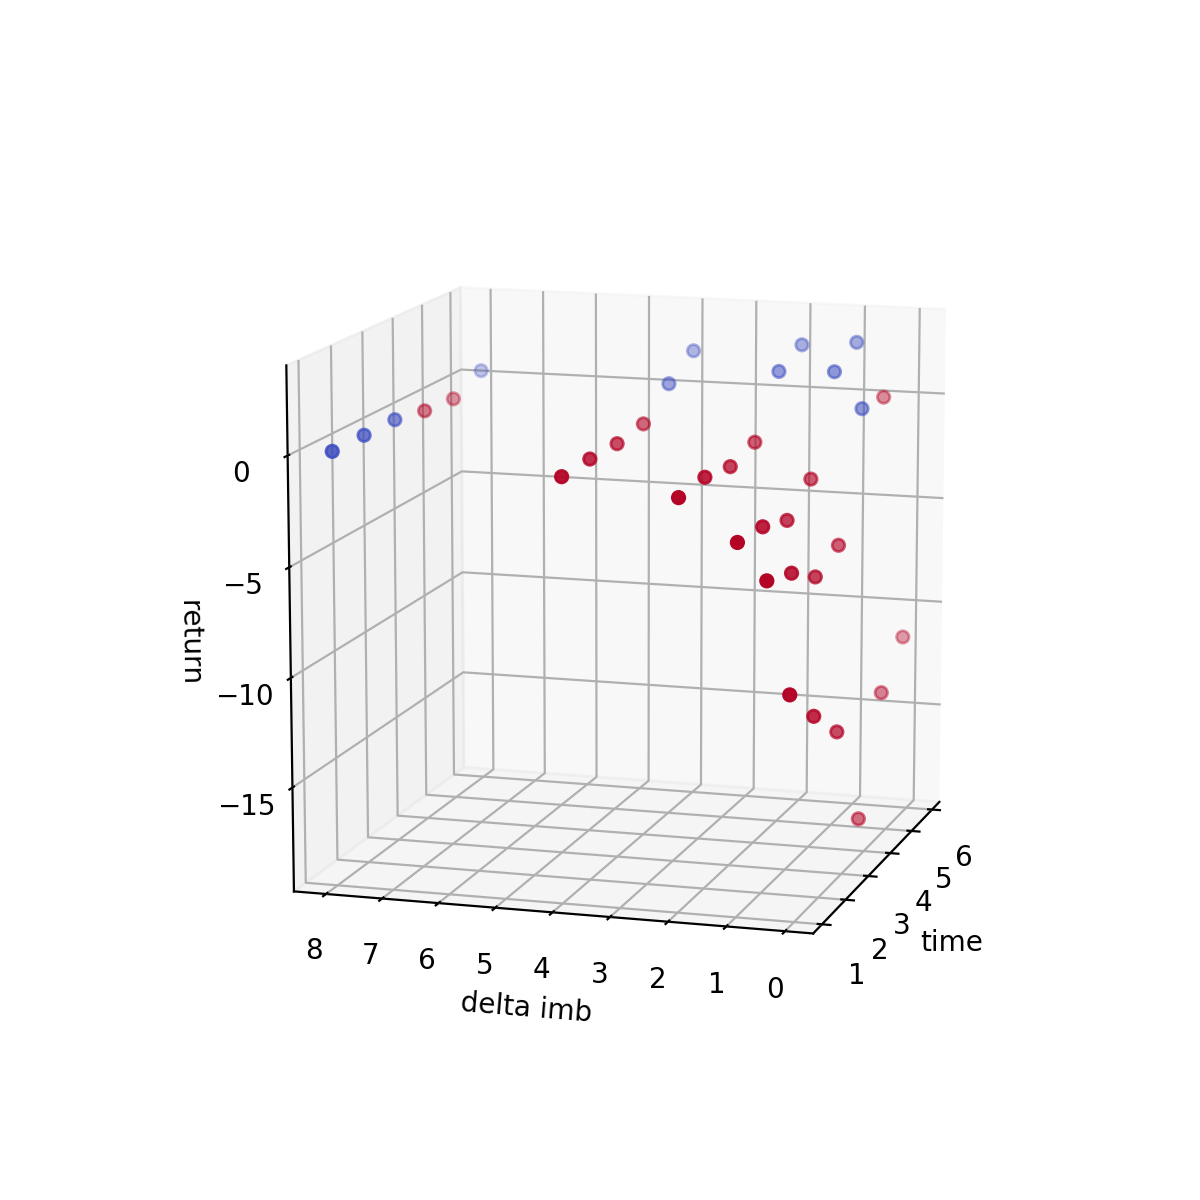

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

x = stats_df['expected_holding_t_mapped'].values # use mapped column for more convenient visual result
y = stats_df['deltaImb_filter'].values
z = stats_df['sum'].values
ax.scatter(x, y, z, c = z<0, cmap = 'coolwarm', marker='o')

ax.set_xlabel('time')
ax.set_ylabel('delta imb')
ax.set_zlabel('return')

plt.show()

*From this 3D plot it is clear that returns are higher when delta imbalance and time holding is high. Also, there are some positive returns when high delta imbalance within short holding period*